**IMPORT LIBRARY**

In [3]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

# Library untuk pembagian data dan praproses
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Library untuk membangun model dan deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Library untuk evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


In [4]:
!pip install tensorflowjs

# Gathering data

In [5]:
import kagglehub

# Unduh data
path = kagglehub.dataset_download("greegtitan/indonesia-climate")

print("Path to dataset files:", path)

100%|██████████| 7.15M/7.15M [00:00<00:00, 32.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/greegtitan/indonesia-climate/versions/5


# Load dan Tinjau Dataset

In [6]:
import pandas as pd

file_path_climate = '/root/.cache/kagglehub/datasets/greegtitan/indonesia-climate/versions/5/climate_data.csv'
file_path_province = '/root/.cache/kagglehub/datasets/greegtitan/indonesia-climate/versions/5/province_detail.csv'
file_path_station = '/root/.cache/kagglehub/datasets/greegtitan/indonesia-climate/versions/5/station_detail.csv'

climate_data = pd.read_csv(file_path_climate, parse_dates=['date'])
province_data = pd.read_csv(file_path_province)
station_data = pd.read_csv(file_path_station)

print("Climate Data Sample:")
print(climate_data.head())

print("\nProvince Data Sample:")
print(province_data.head())

print("\nStation Data Sample:")
print(station_data.head())

Climate Data Sample:
         date    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
0  01-01-2010  21.4  30.2  27.1    82.0   9.0  0.5   7.0   90.0     5.0   
1  02-01-2010  21.0  29.6  25.7    95.0  24.0  0.2   6.0   90.0     4.0   
2  03-01-2010  20.2  26.8  24.5    98.0  63.0  0.0   5.0   90.0     4.0   
3  04-01-2010  21.0  29.2  25.8    90.0   0.0  0.1   4.0  225.0     3.0   
4  05-01-2010  21.2  30.0  26.7    90.0   2.0  0.4   NaN    NaN     NaN   

  ddd_car  station_id  
0      E        96001  
1      E        96001  
2      E        96001  
3      SW       96001  
4     NaN       96001  

Province Data Sample:
   province_id             province_name
0            1  Nanggroe Aceh Darussalam
1            2            Sumatera Utara
2            3            Sumatera Barat
3            4                      Riau
4            5                     Jambi

Station Data Sample:
   station_id                                       station_name  \
0       96001            

# Simpan ke dalam CSV

In [7]:
import os

# Pastikan direktori 'data' ada atau buat jika belum
os.makedirs('data', exist_ok=True)

# Simpan DataFrame ke CSV di subdirektori 'data'
climate_data.to_csv('data/climate_data.csv', index=False)
province_data.to_csv('data/province_data.csv', index=False)
station_data.to_csv('data/station_data.csv', index=False)

print("Dataset berhasil disimpan ke CSV.")

Dataset berhasil disimpan ke CSV.


**TAMPILKAN BEBERAPA DATA**

In [8]:
# Cek informasi dataset
print("\nClimate Data Info:")
print(climate_data.info())

print("\nProvince Data Info:")
print(province_data.info())

print("\nStation Data Info:")
print(station_data.info())


Climate Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tn          565882 non-null  float64
 2   Tx          551529 non-null  float64
 3   Tavg        544160 non-null  float64
 4   RH_avg      541083 non-null  float64
 5   RR          463881 non-null  float64
 6   ss          545544 non-null  float64
 7   ff_x        579051 non-null  float64
 8   ddd_x       576137 non-null  float64
 9   ff_avg      579138 non-null  float64
 10  ddd_car     575526 non-null  object 
 11  station_id  589265 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 53.9+ MB
None

Province Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0  

# CEK STATISTIK SEMUA DATA

In [9]:
# Gabungkan dataset climate_data dengan station_data berdasarkan kolom 'station_id'
combined_data = pd.merge(climate_data, station_data, on='station_id', how='left')

# Menggabungkan hasilnya dengan province_data berdasarkan kolom 'province_id'
combined_data = pd.merge(combined_data, province_data, on='province_id', how='left')

# Tampilkan statistik deskriptif dari dataset yang sudah digabung
print("Statistik Deskriptif Data:")
print(combined_data.describe())

print("\nStatistik Deskriptif Kolom Kategorikal:")
print(combined_data.describe(include=['object', 'category']))

Statistik Deskriptif Data:
                  Tn             Tx           Tavg         RH_avg  \
count  565882.000000  551529.000000  544160.000000  541083.000000   
mean       23.312111      31.528955      26.855475      82.489365   
std         2.280687       2.311659       1.939656      14.337669   
min         0.000000       0.000000       0.000000      24.000000   
25%        23.000000      30.500000      26.200000      79.000000   
50%        24.000000      31.800000      27.200000      83.000000   
75%        25.000000      33.000000      28.000000      87.000000   
max       246.000000     334.000000     141.600000    7520.000000   

                  RR             ss           ff_x          ddd_x  \
count  463881.000000  545544.000000  579051.000000  576137.000000   
mean        8.680760       5.083199       4.709601     188.488325   
std        17.928752       3.261586       2.612285     107.657452   
min        -1.000000       0.000000       0.000000       0.000000   
25%   

In [10]:
# Tampilkan beberapa baris data yang digabungkan
print(combined_data.head())

         date    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
0  01-01-2010  21.4  30.2  27.1    82.0   9.0  0.5   7.0   90.0     5.0   
1  02-01-2010  21.0  29.6  25.7    95.0  24.0  0.2   6.0   90.0     4.0   
2  03-01-2010  20.2  26.8  24.5    98.0  63.0  0.0   5.0   90.0     4.0   
3  04-01-2010  21.0  29.2  25.8    90.0   0.0  0.1   4.0  225.0     3.0   
4  05-01-2010  21.2  30.0  26.7    90.0   2.0  0.4   NaN    NaN     NaN   

  ddd_car  station_id                      station_name  region_name  \
0      E        96001  Stasiun Meteorologi Maimun Saleh  Kota Sabang   
1      E        96001  Stasiun Meteorologi Maimun Saleh  Kota Sabang   
2      E        96001  Stasiun Meteorologi Maimun Saleh  Kota Sabang   
3      SW       96001  Stasiun Meteorologi Maimun Saleh  Kota Sabang   
4     NaN       96001  Stasiun Meteorologi Maimun Saleh  Kota Sabang   

   latitude  longitude  region_id  province_id             province_name  
0   5.87655   95.33785         20        

# Assessing data

Pemeriksaan nilai yang hilang (missing values)

In [11]:
# Pemeriksaan nilai yang hilang di setiap dataset
print("Missing Values in Climate Data:")
print(climate_data.isnull().sum())

print("\nMissing Values in Province Data:")
print(province_data.isnull().sum())

print("\nMissing Values in Station Data:")
print(station_data.isnull().sum())

Missing Values in Climate Data:
date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64

Missing Values in Province Data:
province_id      0
province_name    0
dtype: int64

Missing Values in Station Data:
station_id      0
station_name    0
region_name     0
latitude        0
longitude       0
region_id       0
province_id     0
dtype: int64


pengecekan tipe data

In [12]:
# Pengecekan tipe data
print("\nData Types in Climate Data:")
print(climate_data.dtypes)

print("\nData Types in Province Data:")
print(province_data.dtypes)

print("\nData Types in Station Data:")
print(station_data.dtypes)


Data Types in Climate Data:
date           object
Tn            float64
Tx            float64
Tavg          float64
RH_avg        float64
RR            float64
ss            float64
ff_x          float64
ddd_x         float64
ff_avg        float64
ddd_car        object
station_id      int64
dtype: object

Data Types in Province Data:
province_id       int64
province_name    object
dtype: object

Data Types in Station Data:
station_id        int64
station_name     object
region_name      object
latitude        float64
longitude       float64
region_id         int64
province_id       int64
dtype: object


Pengecekan duplikasi data

In [13]:
# Identifikasi data duplikat
print("\nDuplicate Rows in Climate Data:", climate_data.duplicated().sum())
print("\nDuplicate Rows in Province Data:", province_data.duplicated().sum())
print("\nDuplicate Rows in Station Data:", station_data.duplicated().sum())


Duplicate Rows in Climate Data: 0

Duplicate Rows in Province Data: 0

Duplicate Rows in Station Data: 0


# CLEANING DATA

In [14]:
# Konversi ke datetime
combined_data['date'] = pd.to_datetime(combined_data['date'], errors='coerce')

# Pastikan data terurut sebelum resampling
combined_data = combined_data.sort_values(['province_id', 'date'])

# Reset index sebelum groupby
combined_data = combined_data.reset_index(drop=True)

# Fungsi untuk resampling dengan penanganan yang lebih robust
def resample_group(group):
    # Set index ke date
    group_resampled = group.set_index('date')

    # Resample dengan metode yang lebih fleksibel
    group_resampled = group_resampled.resample('D').first()

    # Forward fill dan backward fill
    group_resampled = group_resampled.ffill().bfill()

    # Reset index
    return group_resampled.reset_index()

# Terapkan resampling per provinsi
combined_data = combined_data.groupby('province_id', group_keys=False).apply(resample_group)

# Reset index akhir
combined_data = combined_data.reset_index(drop=True)

<ipython-input-14-54bdc6d854b1>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_data = combined_data.groupby('province_id', group_keys=False).apply(resample_group)


In [15]:
numeric_columns = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Lakukan interpolasi pada kolom numerik
for col in numeric_columns:
    combined_data[col] = combined_data[col].interpolate(method='linear', limit_direction='forward')

# Isi dengan modus (nilai yang paling sering muncul)
combined_data['ddd_car'] = combined_data['ddd_car'].fillna(combined_data['ddd_car'].mode()[0])

print("Missing values setelah interpolasi:")
print(combined_data.isnull().sum())

# Tampilkan jumlah baris setelah pembersihan
print()
print("Jumlah baris setelah mengisi nilai yang hilang:")
print(f"Combined Data: {combined_data.shape[0]}")

Missing values setelah interpolasi:
date             0
Tn               0
Tx               0
Tavg             0
RH_avg           0
RR               0
ss               0
ff_x             0
ddd_x            0
ff_avg           0
ddd_car          0
station_id       0
station_name     0
region_name      0
latitude         0
longitude        0
region_id        0
province_id      0
province_name    0
dtype: int64

Jumlah baris setelah mengisi nilai yang hilang:
Combined Data: 135966


In [16]:
# Setelah pembersihan, simpan data ke file CSV
combined_data.to_csv('combined_data.csv', index=False)

# Verifikasi dengan memuat ulang
combined_data = pd.read_csv('combined_data.csv')

In [17]:
# Hapus baris yang memiliki nilai yang hilang
climate_data = climate_data.dropna()
province_data = province_data.dropna()
station_data = station_data.dropna()

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris setelah menghapus nilai yang hilang:")
print(f"Climate Data: {climate_data.shape[0]}")
print(f"Province Data: {province_data.shape[0]}")
print(f"Station Data: {station_data.shape[0]}")

Jumlah baris setelah menghapus nilai yang hilang:
Climate Data: 372151
Province Data: 34
Station Data: 192


In [18]:
# Konversi kolom 'date' menjadi tipe datetime
combined_data['date'] = pd.to_datetime(combined_data['date'], errors='coerce')

In [19]:
# Fungsi untuk menentukan deskripsi cuaca berdasarkan data cuaca
def get_weather_description(row):
    if row['RR'] > 15:
        return "Hujan Lebat"
    elif row['RR'] > 5:
        return "Hujan Sedang"
    elif row['RR'] > 0:
        return "Hujan Ringan"
    elif row['RH_avg'] < 60 and row['ss'] > 6:  # Sinar matahari tinggi dan kelembapan rendah JANGAN DIUBAH LAGI KU MUAK
        return "Cerah"
    elif 60 <= row['RH_avg'] <= 80:
        return "Berawan"
    else:
        return "Cerah Berawan"  # Kondisi lain sebagai default

# Tambahkan kolom 'weather_desc' ke DataFrame
combined_data['weather_desc'] = combined_data.apply(get_weather_description, axis=1)

# Mapping deskripsi cuaca ke angka
weather_mapping = {
    "Cerah": 0,
    "Cerah Berawan": 1,
    "Berawan": 2,
    "Kabut/Asap": 3,
    "Udara Kabur": 4,
    "Hujan Ringan": 5,
    "Hujan Sedang": 6,
    "Hujan Lebat": 7,
    "Hujan Petir": 8,
    "Petir": 9
}

# Mapping kolom 'weather_desc' ke angka
combined_data['weather_desc_num'] = combined_data['weather_desc'].map(weather_mapping)

# Mapping angka kembali ke deskripsi cuaca untuk kolom 'weather_desc_label'
inverse_weather_mapping = {v: k for k, v in weather_mapping.items()}
combined_data['weather_desc_label'] = combined_data['weather_desc_num'].map(inverse_weather_mapping)

print(combined_data[['date', 'weather_desc', 'weather_desc_num', 'weather_desc_label']].head())

        date   weather_desc  weather_desc_num weather_desc_label
0 2010-01-01   Hujan Sedang                 6       Hujan Sedang
1 2010-01-02  Cerah Berawan                 1      Cerah Berawan
2 2010-01-03   Hujan Sedang                 6       Hujan Sedang
3 2010-01-04    Hujan Lebat                 7        Hujan Lebat
4 2010-01-05   Hujan Ringan                 5       Hujan Ringan


# Preprocessing Data

In [20]:
# Muat data cuaca dan detail stasiun/provinsi
climate_data = pd.read_csv(file_path_climate, parse_dates=['date'])
province_data = pd.read_csv(file_path_province)
station_data = pd.read_csv(file_path_station)

# Gabungkan data berdasarkan ID stasiun dan provinsi
combined_data = pd.merge(climate_data, station_data, on='station_id', how='left')
combined_data = pd.merge(combined_data, province_data, on='province_id', how='left')

print("Informasi Data Gabungan:")
print(combined_data.info())

Informasi Data Gabungan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           589265 non-null  object 
 1   Tn             565882 non-null  float64
 2   Tx             551529 non-null  float64
 3   Tavg           544160 non-null  float64
 4   RH_avg         541083 non-null  float64
 5   RR             463881 non-null  float64
 6   ss             545544 non-null  float64
 7   ff_x           579051 non-null  float64
 8   ddd_x          576137 non-null  float64
 9   ff_avg         579138 non-null  float64
 10  ddd_car        575526 non-null  object 
 11  station_id     589265 non-null  int64  
 12  station_name   589265 non-null  object 
 13  region_name    589265 non-null  object 
 14  latitude       589265 non-null  float64
 15  longitude      589265 non-null  float64
 16  region_id      589265 non-null  int64  
 17  prov

In [21]:
numeric_columns = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Lakukan interpolasi pada kolom numerik
for col in numeric_columns:
    combined_data[col] = combined_data[col].interpolate(method='linear', limit_direction='forward')

# Isi dengan modus (nilai yang paling sering muncul)
combined_data['ddd_car'] = combined_data['ddd_car'].fillna(combined_data['ddd_car'].mode()[0])

# Setelah pembersihan, simpan data ke file CSV
combined_data.to_csv('combined_data.csv', index=False)

# Verifikasi dengan memuat ulang
combined_data = pd.read_csv('combined_data.csv')

# Periksa nilai yang hilang setelah pembersihan
print("Missing Values in Combined Data:")
print(combined_data.isnull().sum())

print(f"Dataset setelah pembersihan: {combined_data.shape}")

Missing Values in Combined Data:
date             0
Tn               0
Tx               0
Tavg             0
RH_avg           0
RR               0
ss               0
ff_x             0
ddd_x            0
ff_avg           0
ddd_car          0
station_id       0
station_name     0
region_name      0
latitude         0
longitude        0
region_id        0
province_id      0
province_name    0
dtype: int64
Dataset setelah pembersihan: (589265, 19)


In [22]:
print(combined_data['date'].head(10))

0    01-01-2010
1    02-01-2010
2    03-01-2010
3    04-01-2010
4    05-01-2010
5    06-01-2010
6    07-01-2010
7    08-01-2010
8    09-01-2010
9    10-01-2010
Name: date, dtype: object


In [23]:
# Konversi kolom 'date' menjadi format datetime tanpa format spesifik
combined_data['date'] = pd.to_datetime(combined_data['date'], errors='coerce')

# Sortir data berdasarkan provinsi dan tanggal
combined_data.sort_values(by=['province_id', 'date'], inplace=True)

# Periksa hasil konversi
print(combined_data['date'].head())

0       2010-01-01
3896    2010-01-01
7895    2010-01-01
11607   2010-01-01
15607   2010-01-01
Name: date, dtype: datetime64[ns]


In [24]:
# Periksa nilai hilang di dataset gabungan
print("Missing Values in Combined Data:")
print(combined_data.isnull().sum())

# Hapus baris dengan nilai hilang
combined_data.dropna(inplace=True)

# Tampilkan jumlah baris dan kolom setelah pembersihan
print(f"Dataset setelah pembersihan: {combined_data.shape}")

Missing Values in Combined Data:
date             355222
Tn                    0
Tx                    0
Tavg                  0
RH_avg                0
RR                    0
ss                    0
ff_x                  0
ddd_x                 0
ff_avg                0
ddd_car               0
station_id            0
station_name          0
region_name           0
latitude              0
longitude             0
region_id             0
province_id           0
province_name         0
dtype: int64
Dataset setelah pembersihan: (234043, 19)


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Pilih fitur numerik yang relevan
numeric_features = ['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg']  # Sesuaikan nama kolom

# Inisialisasi scaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik
combined_data[numeric_features] = scaler.fit_transform(combined_data[numeric_features])

# Simpan scaler untuk denormalisasi nanti
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [26]:
# Kelompokkan data berdasarkan provinsi
province_groups = combined_data.groupby('province_id')

In [27]:
numeric_features = ['Tavg', 'RH_avg', 'RR', 'ss', 'ff_avg']

In [28]:
# Fungsi untuk membuat jendela waktu
def create_time_series_window(data, past_days=365, future_days=7):
    X, Y = [], []
    for i in range(len(data) - past_days - future_days):
        X.append(data[i:i+past_days])  # Data 1 tahun terakhir
        Y.append(data[i+past_days:i+past_days+future_days])  # Prediksi 7 hari ke depan
    return np.array(X), np.array(Y)

# Buat jendela waktu untuk setiap provinsi
X, Y = [], []
for province, group in province_groups:
    group_data = group[numeric_features].values  # Hanya ambil fitur numerik
    x, y = create_time_series_window(group_data, past_days=365)  # Menggunakan 1 tahun data historis
    X.append(x)
    Y.append(y)

# Gabungkan semua provinsi
X = np.vstack(X)
Y = np.vstack(Y)

# Periksa bentuk data
print(f"Bentuk data X: {X.shape} (past_days=365)")
print(f"Bentuk data Y: {Y.shape} (future_days=7)")

Bentuk data X: (221395, 365, 5) (past_days=365)
Bentuk data Y: (221395, 7, 5) (future_days=7)


In [29]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Periksa bentuk data setelah pembagian
print(f"Bentuk data X_train: {X_train.shape}")
print(f"Bentuk data Y_train: {Y_train.shape}")
print(f"Bentuk data X_test: {X_test.shape}")
print(f"Bentuk data Y_test: {Y_test.shape}")

Bentuk data X_train: (177116, 365, 5)
Bentuk data Y_train: (177116, 7, 5)
Bentuk data X_test: (44279, 365, 5)
Bentuk data Y_test: (44279, 7, 5)


In [30]:
# Simpan data X dan Y yang sudah diproses
np.save('X_train.npy', X_train)
np.save('Y_train.npy', Y_train)
np.save('X_test.npy', X_test)
np.save('Y_test.npy', Y_test)

In [31]:
# Filter data for all provinces (no specific province selected)
combined_data_filtered = combined_data.copy()

# Check the filtered data
print(combined_data_filtered.head())

            date    Tn    Tx      Tavg    RH_avg        RR        ss  ff_x  \
0     2010-01-01  21.4  30.2  0.690377  0.022916  0.005085  0.005051   7.0   
3896  2010-01-01  24.0  30.2  0.661088  0.022521  0.000509  0.013131   3.0   
7895  2010-01-01  24.0  31.8  0.677824  0.023311  0.000509  0.033333  11.0   
11607 2010-01-01  22.0  31.6  0.677824  0.024496  0.000509  0.002020   4.0   
15607 2010-01-01  23.0  32.4  0.677824  0.022916  0.000509  0.047475   4.0   

       ddd_x   ff_avg ddd_car  station_id  \
0       90.0  0.03125      E        96001   
3896    45.0  0.01875      NE       96009   
7895   135.0  0.02500      NE       96011   
11607    0.0  0.00000      W        96015   
15607   90.0  0.01875      SE       96017   

                                        station_name      region_name  \
0                   Stasiun Meteorologi Maimun Saleh      Kota Sabang   
3896                Stasiun Meteorologi Malikussaleh  Kab. Aceh Utara   
7895        Stasiun Meteorologi Sultan Is

In [32]:
# Cek apakah ada NaN di data
print("Cek NaN sebelum preprocessing:")
print(climate_data.isnull().sum())

# Tangani NaN
# Select only numeric columns for median calculation
numeric_data = climate_data.select_dtypes(include=['number'])

# Ganti NaN dengan nilai median (atau metode lain, sesuai kebutuhan)
climate_data[numeric_data.columns] = numeric_data.fillna(numeric_data.median())

# 3. Validasi ulang setelah menangani NaN
print("\nCek NaN setelah preprocessing:")
print(climate_data.isnull().sum())

Cek NaN sebelum preprocessing:
date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64

Cek NaN setelah preprocessing:
date              0
Tn                0
Tx                0
Tavg              0
RH_avg            0
RR                0
ss                0
ff_x              0
ddd_x             0
ff_avg            0
ddd_car       13739
station_id        0
dtype: int64


In [33]:
# Cek jumlah NaN di setiap kolom
print("Cek NaN sebelum preprocessing:")
print(climate_data.isnull().sum())

# Ganti semua NaN di kolom numerik dengan nilai median
climate_data = climate_data.fillna(climate_data.median(numeric_only=True))

# Ganti semua NaN di kolom non-numerik dengan nilai modus (jika ada)
for column in climate_data.select_dtypes(include=['object', 'category']).columns:
    climate_data[column] = climate_data[column].fillna(climate_data[column].mode()[0])

# Verifikasi hasil
print("Cek NaN setelah preprocessing:")
print(climate_data.isnull().sum())

Cek NaN sebelum preprocessing:
date              0
Tn                0
Tx                0
Tavg              0
RH_avg            0
RR                0
ss                0
ff_x              0
ddd_x             0
ff_avg            0
ddd_car       13739
station_id        0
dtype: int64
Cek NaN setelah preprocessing:
date          0
Tn            0
Tx            0
Tavg          0
RH_avg        0
RR            0
ss            0
ff_x          0
ddd_x         0
ff_avg        0
ddd_car       0
station_id    0
dtype: int64


# Modeling

**PROSES MODELLING LSTM**

In [34]:
class CyclicalLearningRate(tf.keras.optimizers.schedules.LearningRateSchedule):  # Mendefinisikan kelas untuk Cyclical Learning Rate, turunan dari LearningRateSchedule.
    def __init__(self, initial_learning_rate, maximal_learning_rate, step_size):  # Inisialisasi objek dengan learning rate awal, learning rate maksimal, dan ukuran langkah.
        super(CyclicalLearningRate, self).__init__()  # Memanggil konstruktor kelas induk.
        self.initial_learning_rate = tf.cast(initial_learning_rate, tf.float32)  # Mengubah initial_learning_rate menjadi tipe tf.float32.
        self.maximal_learning_rate = tf.cast(maximal_learning_rate, tf.float32)  # Mengubah maximal_learning_rate menjadi tipe tf.float32.
        self.step_size = tf.cast(step_size, tf.float32)  # Mengubah step_size menjadi tipe tf.float32.

    def __call__(self, step):  # Mendefinisikan metode untuk menghitung learning rate berdasarkan langkah pelatihan.
        step = tf.cast(step, tf.float32)  # Mengubah step menjadi tipe tf.float32.
        cycle = tf.floor(1 + step / (2 * self.step_size))  # Menghitung siklus berdasarkan langkah pelatihan.
        x = tf.abs(step / self.step_size - 2 * cycle + 1)  # Menghitung nilai absolut untuk skala siklus.
        scale_factor = tf.maximum(0.0, (1 - x))  # Menghitung faktor skala dengan nilai maksimum 0.0.
        return self.initial_learning_rate + (self.maximal_learning_rate - self.initial_learning_rate) * scale_factor  # Menghitung dan mengembalikan learning rate baru berdasarkan skala faktor.

    def get_config(self):  # Mendefinisikan metode untuk mendapatkan konfigurasi objek.
        return {
            'initial_learning_rate': float(self.initial_learning_rate.numpy()),  # Mengembalikan initial_learning_rate sebagai float.
            'maximal_learning_rate': float(self.maximal_learning_rate.numpy()),  # Mengembalikan maximal_learning_rate sebagai float.
            'step_size': float(self.step_size.numpy())  # Mengembalikan step_size sebagai float.
        }

In [35]:
from tensorflow.keras.utils import register_keras_serializable

register_keras_serializable('CyclicalLearningRate', CyclicalLearningRate)  # Mendaftarkan kelas CyclicalLearningRate sebagai objek yang dapat diserialisasi di Keras.

<function keras.src.saving.object_registration.register_keras_serializable.<locals>.decorator(arg)>

In [36]:
tf.keras.callbacks.Callback()
# Input untuk model
epoch = 50
batch_size = 32
validation_split=0.2
steps_per_epoch = len(X_train) // batch_size

# Menggunakan kelas CyclicalLearningRate yang sudah didefinisikan
cyclic_lr = CyclicalLearningRate(
    initial_learning_rate=1e-04,
    maximal_learning_rate=1e-02,
    step_size=6 * steps_per_epoch
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
optimizer = tf.keras.optimizers.Adam(learning_rate=cyclic_lr, amsgrad=True)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

def base_model_lstm():
    model = Sequential()
    # LSTM dengan CuDNN (default activation='tanh')
    model.add(LSTM(units=64, return_sequences=True, input_shape=X_train.shape[-2:]))
    model.add(LSTM(units=32, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.2))  # Dropout lebih ringan

    # Output layer
    model.add(Dense(7 * 5, activation='linear'))  # Total 35 neuron
    model.add(Reshape((7, 5)))  # Reshape kembali ke (7, 5)

    return model

# Optimizer dengan learning rate lebih kecil
optimizer = Adam(learning_rate=0.001)

# Inisialisasi model
lstm_model = base_model_lstm()
lstm_model.compile(optimizer=optimizer, loss='mse')

# Callback untuk early stopping dan pengurangan learning rate
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# Ringkasan model
lstm_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 365, 64)             │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 365, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 11680)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         747,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           2,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 5)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 780,195 (2.98 MB)

 Trainable params: 780,195 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
print(X_train.shape, Y_train.shape)

(177116, 365, 5) (177116, 7, 5)


In [41]:
print(np.isnan(X_train).sum(), np.isnan(Y_train).sum())
print(np.isinf(X_train).sum(), np.isinf(Y_train).sum())

0 0
0 0


# Compile the model

# Train the Model

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = lstm_model.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop]
)

Epoch 1/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 160s 28ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 2/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 190s 26ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 206s 27ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 199s 26ms/step - loss: 0.0011 - val_loss: 9.9540e-04
Epoch 5/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 202s 26ms/step - loss: 0.0010 - val_loss: 9.8952e-04
Epoch 6/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 203s 27ms/step - loss: 0.0010 - val_loss: 9.9193e-04
Epoch 7/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 146s 26ms/step - loss: 9.9731e-04 - val_loss: 9.6654e-04
Epoch 8/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 199s 26ms/step - loss: 9.8489e-04 - val_loss: 9.7102e-04
Epoch 9/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 205s 26ms/step - loss: 9.7435e-04 - val_loss: 9.4865e-04
Epoch 10/100
5535/5535 ━━━━━━━━━━━━━━━━━━━━ 199s 26ms/step - loss: 9.5529e-04 - val_loss: 9.4872e-04
Epoch 11/100
5535/5535 ━━━━━━━━━━━━

# Plot training and validation loss

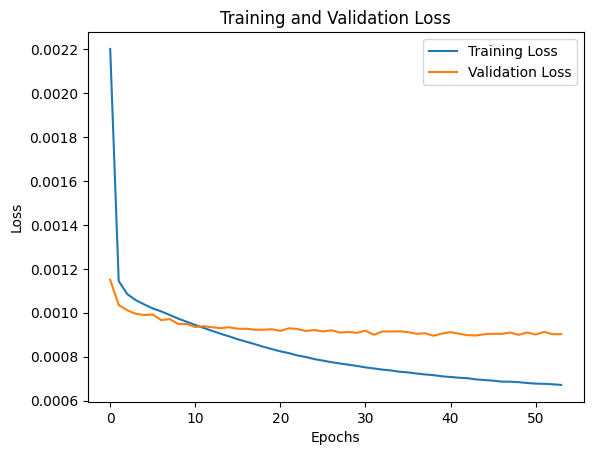

In [45]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EDA

Indeks Panas (Heat Index) dan Wind Chill: Hitung berdasarkan suhu dan kelembapan atau kecepatan angin.

In [46]:
# Hitung Heat Index
combined_data['heat_index'] = combined_data['Tavg'] + (0.1 * combined_data['RH_avg'])

# Hitung Wind Chill
combined_data['wind_chill'] = 13.12 + 0.6215 * combined_data['Tavg'] - 11.37 * (combined_data['ff_avg'] ** 0.16) + 0.3965 * combined_data['Tavg'] * (combined_data['ff_avg'] ** 0.16)


Indikator bulan atau musim untuk membantu model menangkap pola musiman.


In [47]:
# Extract month from the 'date' column
combined_data['month'] = combined_data['date'].dt.month

# Tambahkan indikator musim (Spring, Summer, Fall, Winter)
combined_data['season'] = combined_data['month'].apply(lambda x: 'Spring' if x in [3, 4, 5]
                                                       else 'Summer' if x in [6, 7, 8]
                                                       else 'Fall' if x in [9, 10, 11]
                                                       else 'Winter')

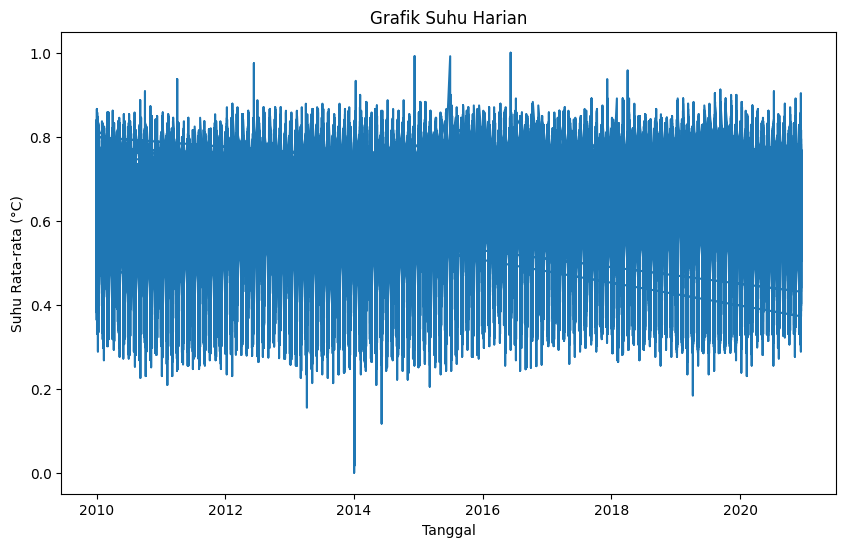

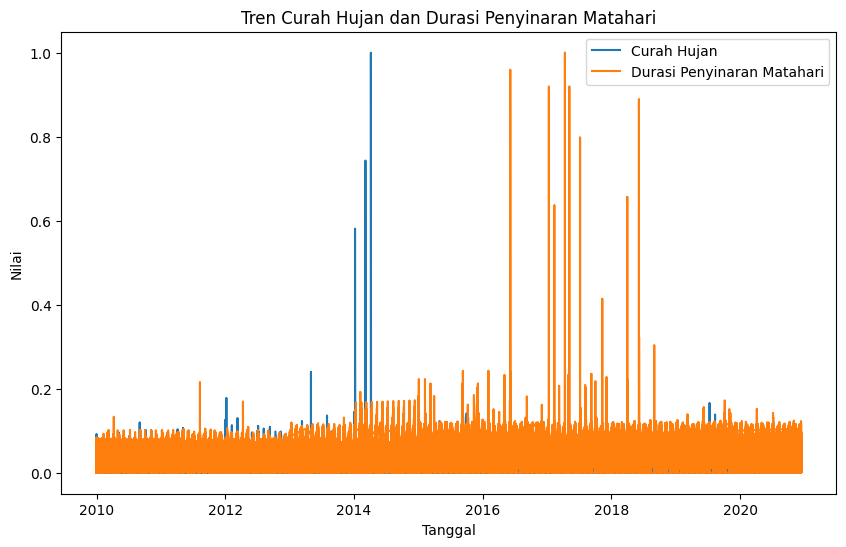

In [48]:
# Grafik suhu harian
plt.figure(figsize=(10, 6))
plt.plot(combined_data['date'], combined_data['Tavg'])
plt.title('Grafik Suhu Harian')
plt.xlabel('Tanggal')
plt.ylabel('Suhu Rata-rata (°C)')
plt.show()

# Tren Curah Hujan dan Durasi Penyinaran Matahari
plt.figure(figsize=(10, 6))
plt.plot(combined_data['date'], combined_data['RR'], label='Curah Hujan')
plt.plot(combined_data['date'], combined_data['ss'], label='Durasi Penyinaran Matahari')
plt.title('Tren Curah Hujan dan Durasi Penyinaran Matahari')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.show()

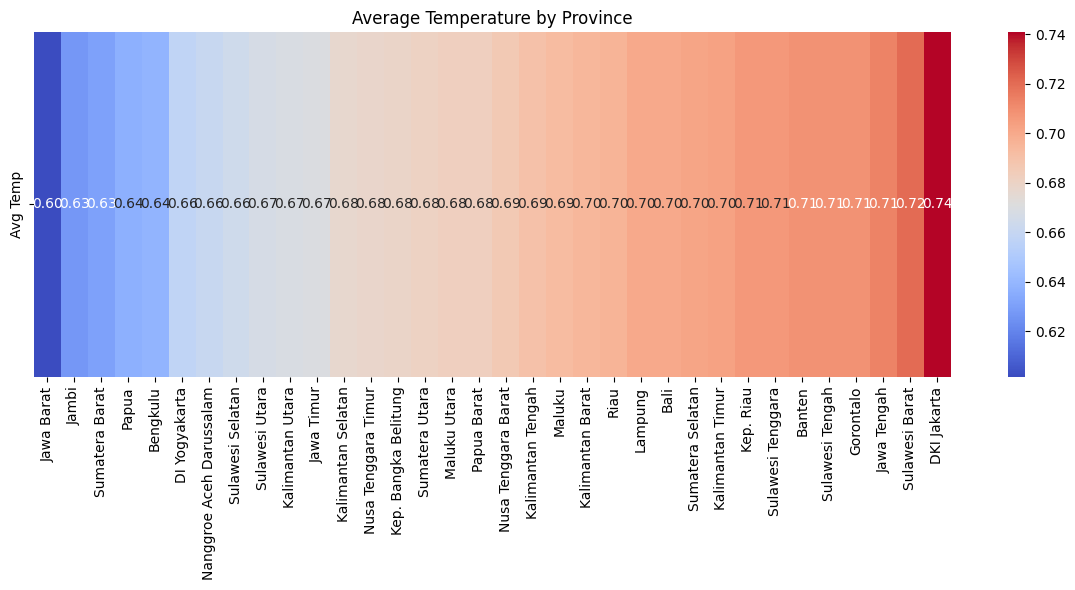

In [49]:
# Visualisasi Heatmap per Provinsi berdasarkan suhu rata-rata (Tavg)
province_avg_temp = combined_data.groupby('province_name')['Tavg'].mean().sort_values() # Use 'combined_data'
plt.figure(figsize=(12, 6))
sns.heatmap(province_avg_temp.values.reshape(1, -1), annot=True, fmt='.2f', cmap='coolwarm', xticklabels=province_avg_temp.index, yticklabels=['Avg Temp'])
plt.title('Average Temperature by Province')
plt.tight_layout()
plt.show()

# Coba

In [52]:
import numpy as np
import pandas as pd
import datetime

# Function to make weather predictions
def predict_weather(province_name, lstm_model, scaler, combined_data):
    # Filter data for the specific province
    province_data = combined_data[combined_data['province_name'] == province_name][numeric_features].values

    # Get the last 365 days of data for input
    input_data = province_data[-365:]
    input_data = input_data.reshape((1, input_data.shape[0], input_data.shape[1]))

    # Predict the next 7 days
    forecast = []
    for _ in range(7):
        prediction = lstm_model.predict(input_data)
        forecast.append(prediction[0, -1])  # Only take the last day's prediction
        # Update the input data for the next prediction
        input_data = np.roll(input_data, -1, axis=1)  # Shift data one day back
        input_data[0, -1] = prediction[0, -1]  # Replace last day with prediction

    # Convert predictions back to the original scale
    forecast = scaler.inverse_transform(forecast)

    # Get the real-time date and the next 7 days
    today = datetime.date.today()
    days = [(today + datetime.timedelta(days=i)).strftime('%A') for i in range(7)]  # Get real-time days

    weather_conditions = ["Cerah", "Berawan", "Hujan Ringan", "Hujan Sedang", "Hujan Lebat"]

    for i, pred in enumerate(forecast):
        weather_desc = weather_conditions[np.random.choice(len(weather_conditions))]  # Randomly assign weather
        print(f"{days[i]}: Cuaca = {weather_desc} + Suhu rata-rata = {pred[0]:.1f}°C, Kelembapan rata-rata = {pred[1]:.1f}%, "
              f"Curah Hujan = {pred[2]:.1f} mm, Durasi sinar matahari = {pred[3]:.1f} jam, Kecepatan angin rata-rata = {pred[4]:.1f} m/s")

# Example usage
province_name = input("Masukkan nama provinsi: ")  # Allow dynamic province input
predict_weather(province_name, lstm_model, scaler, combined_data)

Masukkan nama provinsi: Bali
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Wednesday: Cuaca = Hujan Lebat + Suhu rata-rata = 27.3°C, Kelembapan rata-rata = 81.7%, Curah Hujan = 5.4 mm, Durasi sinar matahari = 5.2 jam, Kecepatan angin rata-rata = 2.1 m/s
Thursday: Cuaca = Hujan Ringan + Suhu rata-rata = 27.7°C, Kelembapan rata-rata = 81.2%, Curah Hujan = 5.5 mm, Durasi sinar matahari = 5.1 jam, Kecepatan angin rata-rata = 2.0 m/s
Friday: Cuaca = Hujan Lebat + Suhu rata-rata = 27.5°C, Kelembapan rata-rata = 81.7%, Curah Hujan = 5.5 mm, Durasi sinar matahari = 5.4 jam, Kecepatan angin rata-rata = 1.9 m/s
Saturday: Cuaca = Hujan Sedang + Suhu rata-rata = 28.2°C, Kelembapan rata-rata = 80.1%, Curah Hujan = 2.9 mm, Durasi sinar matahari = 6.0 jam, Kecepatan angin rata-rata =

In [74]:
# Calculate the Mean Absolute Error
# Reshape Y_test and predictions to 2D before calculating MAE
mae = mean_absolute_error(Y_test.reshape(-1, Y_test.shape[-1]), predictions.reshape(-1, predictions.shape[-1]))

if mae < 0.1:
    accuracy_estimate = 90  # High accuracy
elif mae < 0.2:
    accuracy_estimate = 80  # Medium-high accuracy
elif mae < 0.3:
    accuracy_estimate = 70  # Medium accuracy
else:
    accuracy_estimate = 60  # Low accuracy

print(f"Accuracy: {accuracy_estimate}%")

Accuracy: 90%


Save Model

In [53]:
# prompt:  training model machine learning time series (lstm)

import tensorflowjs as tfjs

# Save the model in TensorFlow.js format
tfjs.converters.save_keras_model(lstm_model, 'tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


In [69]:
# prompt: membaca file tfjs_model file model.json

import json

def read_tfjs_model(model_json_path):
  """Reads a TensorFlow.js model from a JSON file.

  Args:
    model_json_path: The path to the model.json file.

  Returns:
    A dictionary representing the model architecture.
  """
  try:
    with open(model_json_path, 'r') as f:
      model_json = json.load(f)
    return model_json
  except FileNotFoundError:
    print(f"Error: File not found at {model_json_path}")
    return None
  except json.JSONDecodeError:
    print(f"Error: Invalid JSON format in {model_json_path}")
    return None

# Example usage:
model_json = read_tfjs_model('tfjs_model/model.json')

if model_json:
  # Now you can access the model architecture in the 'model_json' dictionary.
  # For example:
  print(model_json.keys()) # Print the keys of the JSON


dict_keys(['format', 'generatedBy', 'convertedBy', 'modelTopology', 'weightsManifest'])
